In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv(r'C:\Hotel_Reviews.csv', low_memory=False,delimiter=',', encoding='iso-8859-1', decimal='.')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [3]:
# cria novo dataframe a partir das colunas que eu quero
df = data[['Negative_Review', 'Positive_Review', 'Reviewer_Score']]
df.sample(5)

,Negative_Review,Positive_Review,Reviewer_Score
387256,The rooms are too small paper thin walls that...,Location,4.6
28295,Nothing,Friendly staff quite hotel cleanliness locati...,10.0
115624,At breakfast you need to gaurd your table l h...,Quiet location great swimming pool,7.9
68395,Breakfast was limited and decorations needs a...,Excellent location for Canary Wharf and O2 Ar...,7.9
262886,I did not like the restaurant The food was me...,The breakfast buffet was good and consistent ...,8.3


In [4]:
# substitui as avaliações "No negative" e "No positive" por string vazia
df.loc[:, 'Positive_Review'] = data.Positive_Review.apply(lambda x: x.replace('No Positive', ''))
df.loc[:, 'Negative_Review'] = data.Negative_Review.apply(lambda x: x.replace('No Negative', ''))
df.sample(5)

,Negative_Review,Positive_Review,Reviewer_Score
513070,Check in was supposed to be from 3pm We got t...,The rooms were small but nicely put together ...,8.3
319029,,Very good location and good breakfast,9.2
332777,,We loved everything about this hotel from the...,10.0
184509,furnishings in room were old and dingy Rugs s...,room size was good,6.7
333476,Bed was not level leaned to one side which ma...,The location of the hotel was fantastic it wa...,7.9


In [7]:
# retorna a coluna positiva ou negativa de acordo com a nota

def calculate_total_review(row):
    if row['Reviewer_Score'] < 6:
        return row['Negative_Review']
    else:
        return row['Positive_Review']

In [8]:
df.loc[:,'Total_Review'] = df.apply(calculate_total_review, axis=1)

df.sample(20)

,Negative_Review,Positive_Review,Reviewer_Score,Total_Review
302205,No room service provided after 11 pm sink is ...,Convenient location and excellent breakfast,6.7,Convenient location and excellent breakfast
263739,Pillows and quilt Both were very thin I woke ...,location breakfast room shower,9.2,location breakfast room shower
351402,,the staff were excellent very kinde and frien...,10.0,the staff were excellent very kinde and frien...
120695,air con heating room cold,location staff,7.1,location staff
482125,,Carlo and Deborah are the best hotel staff we...,10.0,Carlo and Deborah are the best hotel staff we...
412441,,Large selection at breakfast Close to a mall ...,9.6,Large selection at breakfast Close to a mall ...
513936,One lift was out of order Although the curtai...,convenient walking distance to Proms in the A...,8.8,convenient walking distance to Proms in the A...
106978,No proper restaurant and poor room service me...,Professionalism Maud one of the front desk ag...,8.8,Professionalism Maud one of the front desk ag...
133365,,Extra helpful and professional stuff Perfect ...,10.0,Extra helpful and professional stuff Perfect ...
425516,value for money cannot even talk about it The...,it is close to the beach there are some good ...,5.4,value for money cannot even talk about it The...


In [10]:
# classifica avaliações como negative e positive
df.loc[:,'review_type'] = df["Reviewer_Score"].apply(
    lambda x: "negative" if x < 6 else "positive"
)
df.sample(5)

,Negative_Review,Positive_Review,Reviewer_Score,Total_Review,review_type
176271,Wooden floors are too creaky and you could he...,Bed was comfy and location was ideal from the...,4.6,Wooden floors are too creaky and you could he...,negative
136983,,Fantastic location all the major attractions ...,9.2,Fantastic location all the major attractions ...,positive
267495,Breakfast wasn t included in our packages and...,The hotel was very well equipped staff were f...,9.6,The hotel was very well equipped staff were f...,positive
74525,There s not a single thing we didn t like abo...,From the moment we arrived to the moment that...,10.0,From the moment we arrived to the moment that...,positive
458369,The bad manners of some of the guests not rea...,Reception staff were really lovely Location,9.6,Reception staff were really lovely Location,positive


In [11]:
# cria um dataframe somente com o comentário e sua classificação
df_reviews = df[["Total_Review", "review_type"]]
df_reviews

,Total_Review,review_type
0,I am so angry that i made this post available...,negative
1,No real complaints the hotel was great great ...,positive
2,Location was good and staff were ok It is cut...,positive
3,My room was dirty and I was afraid to walk ba...,negative
4,Amazing location and building Romantic setting,positive
...,...,...
515733,location,positive
515734,The hotel looks like 3 but surely not 4,negative
515735,The ac was useless It was a hot week in vienn...,negative
515736,The rooms are enormous and really comfortable...,positive


In [13]:
# separa as avaliações em positive e negative
positive_reviews = df_reviews[df_reviews.review_type == "positive"]
negative_reviews = df_reviews[df_reviews.review_type == "negative"]

In [14]:
# determina o número mínimo de avaliações em uma categoria
min_reviews = min(len(positive_reviews), len(negative_reviews))

# aleatoriza e seleciona um número igual de avaliações de cada categoria
positive_df = positive_reviews.sample(n=min_reviews, random_state=42)
negative_df = negative_reviews.sample(n=min_reviews, random_state=42)

# concatena os DataFrames de avaliações positivas e negativas
df_review_resampled = pd.concat([positive_df, negative_df], ignore_index=True)

df_review_resampled

,Total_Review,review_type
0,The beautiful hotel is situated at an excelle...,positive
1,Lovely suite excellent spa facility comfortab...,positive
2,Location close to Metro bar prices,positive
3,Its clow from all important things to visit i...,positive
4,Great location just off trafalger staff were ...,positive
...,...,...
105009,bathroom was very dirty it had stains furnitu...,negative
105010,Really not a 4 star property,negative
105011,The hotel pictures were not the same the actu...,negative
105012,Pull out bed so uncomfortable tried to fix it...,negative


Text(0.5, 1.0, 'Review type resampled)')

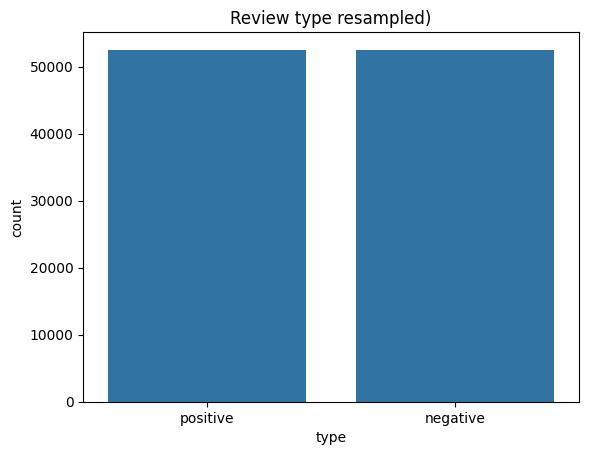

In [15]:
# plotla gráfico para verificar o equilíbrio entre as classificações de dados
sns.countplot(
  x='review_type',
  data=df_review_resampled,
  order=df_review_resampled.review_type.value_counts().index
)

plt.xlabel("type")
plt.title("Review type resampled)")

In [16]:
# remoção de stopwords
stop_words = set(stopwords.words('english'))

# função de remover stopwords do texto
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# remove stopwords do dataframe
df_review_resampled['Total_Review'] = df_review_resampled['Total_Review'].apply(remove_stopwords)

df_review_resampled.to_csv('df_to_train_pos_neg.csv', index=False)
